In [ ]:
# load the libraries

import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as py
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier



In [4]:
# load the dataset

data = pd.read_csv("fraud_transactions.csv")

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# more basic statistics

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# check for null values

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

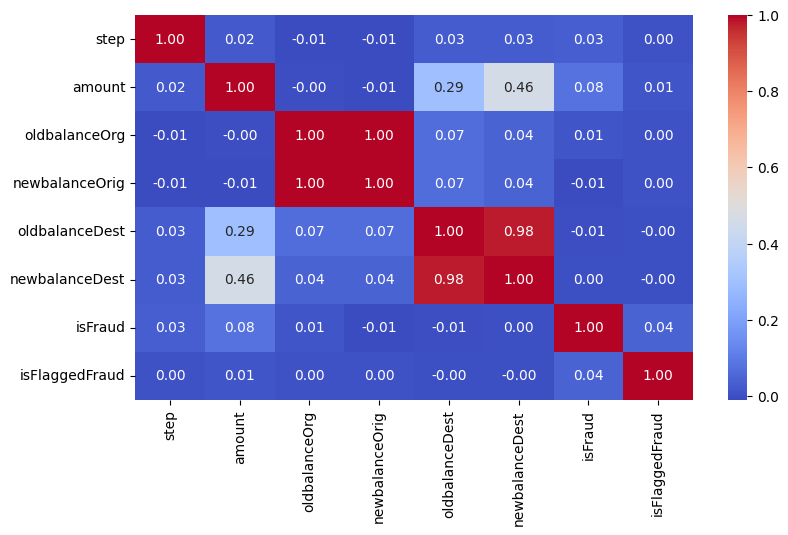

In [8]:
# correlation matrix

# Select only columns with numerical values

corr_mat = data.select_dtypes(include=['number']).corr()

# Visualisation of the correlation

plt.figure(figsize=(9,5))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


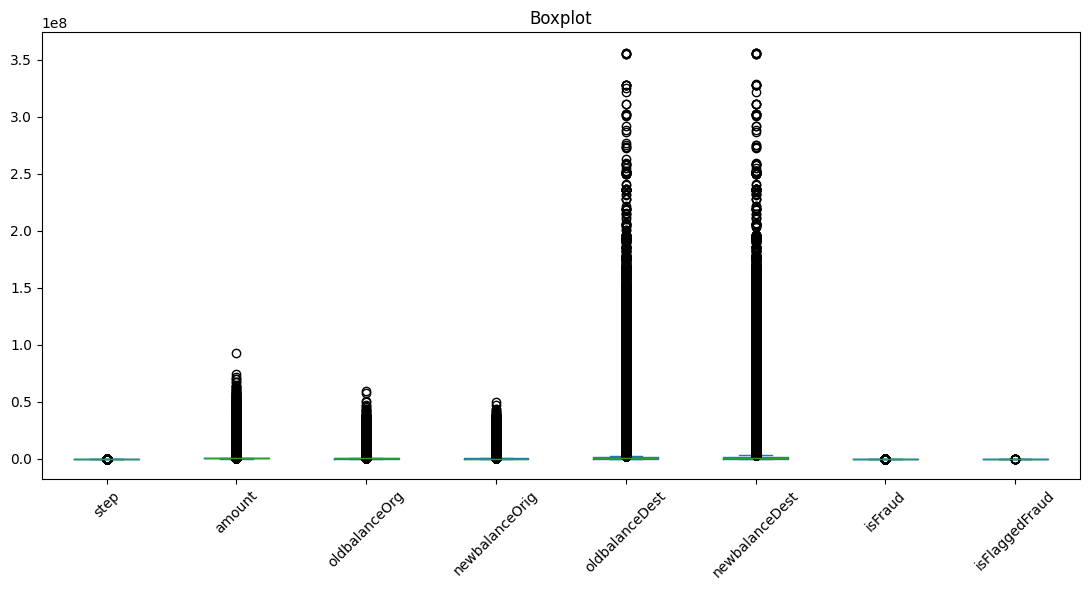

In [22]:
# Visualisation 1: Box plot

data.plot(kind='box', title = 'Boxplot', figsize=(11,6))
plt.xticks(rotation=45)
plt.tight_layout()


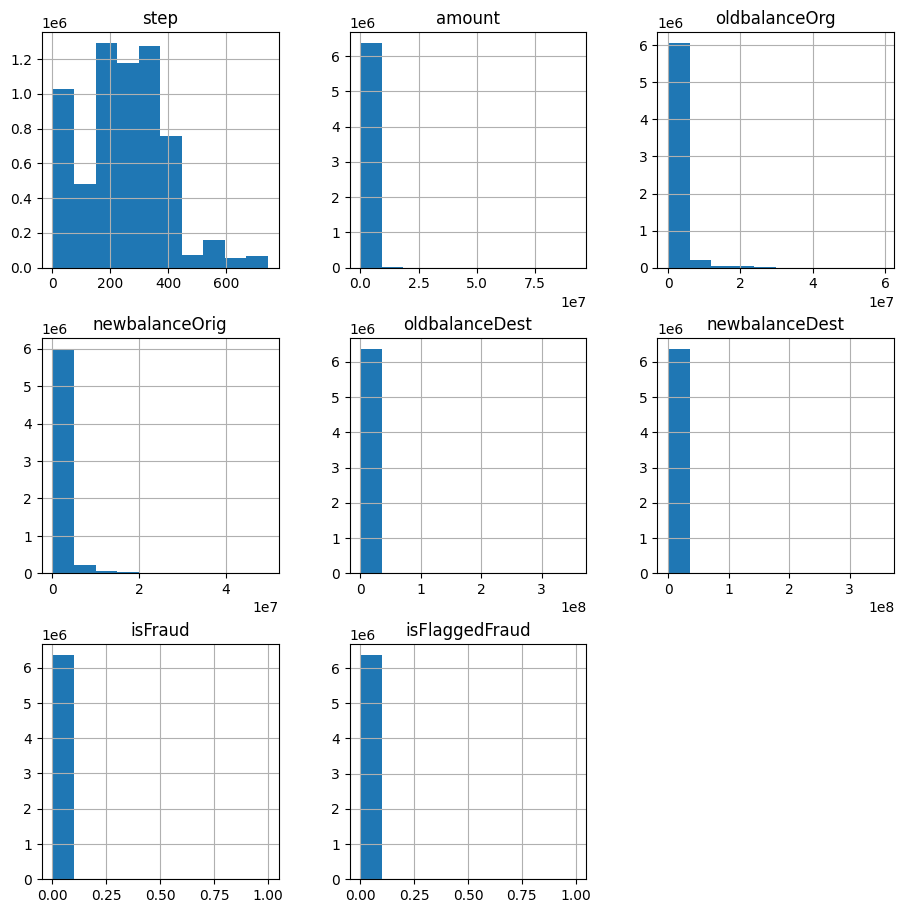

In [ ]:
# Viisualisation 2: Histogram

data.hist(bins=10, figsize=(11,11))
plt.show()

In [ ]:
# Count fraud vs. non-fraud transactions

fraud_count = data["isFraud"].value_counts()

print(fraud_count)


isFraud
0    6354407
1       8213
Name: count, dtype: int64


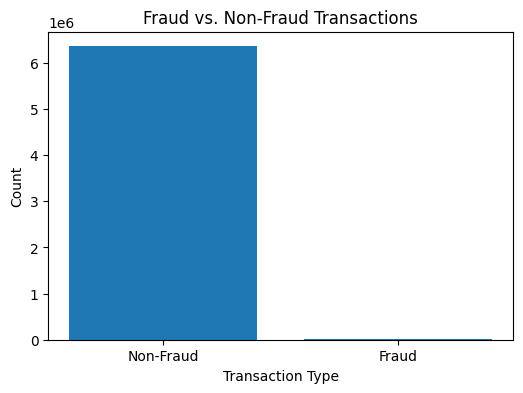

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create bar chart to visualise imbalanced dataset

plt.figure(figsize=(6,4))
plt.bar(["Non-Fraud", "Fraud"], fraud_count)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()
plt.tight_layout()

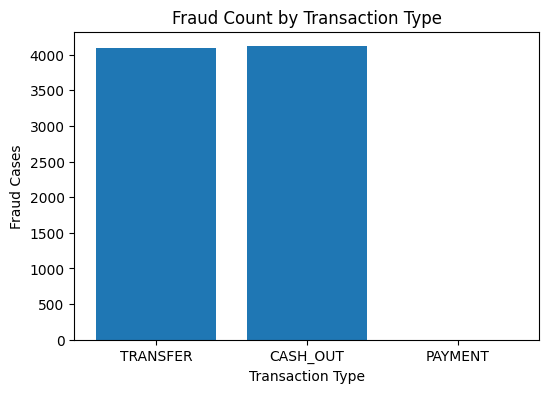

<Figure size 640x480 with 0 Axes>

In [ ]:
# Count fraud cases per transaction type

fraud_counts = data[data["isFraud"] == 1]["type"].value_counts()

# Ensure all three transaction types are included

transaction_types = ["TRANSFER", "CASH_OUT", "PAYMENT"]
fraud_values = [fraud_counts.get(t, 0) for t in transaction_types] 

# Plot bar chart

plt.figure(figsize=(6,4))
plt.bar(transaction_types, fraud_values)
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Cases")
plt.title("Fraud Count by Transaction Type")
plt.show()
plt.tight_layout()


In [15]:
# now encode the necessary data into a numerical format

data['type'] = data['type'].map({'TRANSFER': 0, 'CASH_OUT': 1, 'PAYMENT': 2})


In [16]:
# check if it has worked

data.head()

data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2.0,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0
1,1,2.0,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0
2,1,0.0,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0
3,1,1.0,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0
4,1,2.0,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1.0,0.264665,C786484425,-0.171108,-0.292442,C776919290,-0.323814,-0.240959,1,0
6362616,743,0.0,10.153953,C1529008245,1.896491,-0.292442,C1881841831,-0.323814,-0.333411,1,0
6362617,743,1.0,10.153953,C1162922333,1.896491,-0.292442,C1365125890,-0.303665,1.403027,1,0
6362618,743,0.0,1.109765,C1685995037,0.005581,-0.292442,C2080388513,-0.323814,-0.333411,1,0


In [17]:
# scale the data

scaler = StandardScaler()
data[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]] = \
    scaler.fit_transform(data[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]])


In [18]:
# select variables

X = data.drop("isFraud", axis=1)  # Drop target column
y = data["isFraud"]

In [19]:
# Split 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Drop categorical columns

X_train = X_train.drop(["nameOrig", "nameDest"], axis=1)
X_test = X_test.drop(["nameOrig", "nameDest"], axis=1)


In [ ]:
# Train Decision Tree model

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


In [ ]:
# Predict on test data

y_pred_tree = tree_clf.predict(X_test)

In [ ]:
# Print classification report

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.89      0.88      0.89      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [24]:
# Create confusion matrix

conf_mat = confusion_matrix(y_test, y_pred_tree)
print(conf_mat)

[[1270700     181]
 [    193    1450]]


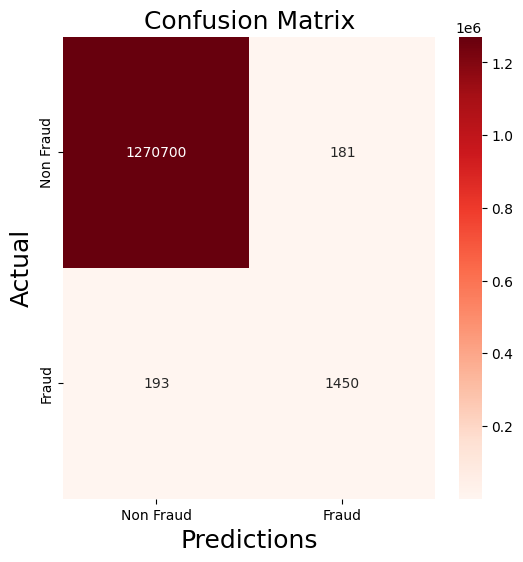

In [ ]:
# Visualise Confusion Matrix

# Create labels

labels = ['Non Fraud', 'Fraud']

# Plot the confusion matrix with axes labelled

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='Reds',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()